In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
mbti_df=pd.read_csv('/content/drive/MyDrive/mbti_1.csv')
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
mbti_df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
mbti_df.isnull().any()

type     False
posts    False
dtype: bool

In [ ]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
total = mbti_df.groupby(['type']).count()
total

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


Data Visualization

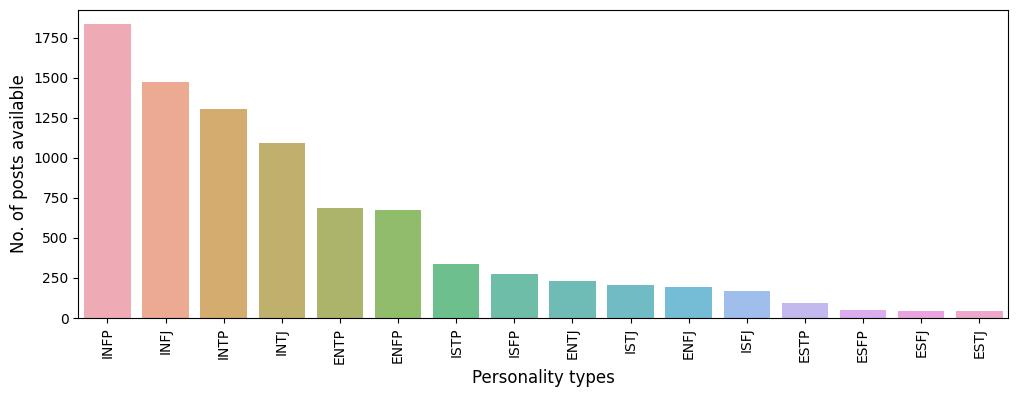

In [ ]:
#Plotting this in descending order for better understanding of this visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_set' contains your dataset

cnt_srs = mbti_df['type'].value_counts()

# Sort the values in descending order for better visualization
cnt_srs = cnt_srs.sort_values(ascending=False)

plt.figure(figsize=(12, 4))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts available', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


Text(0.5, 1.0, 'Distribution of lengths of the post')

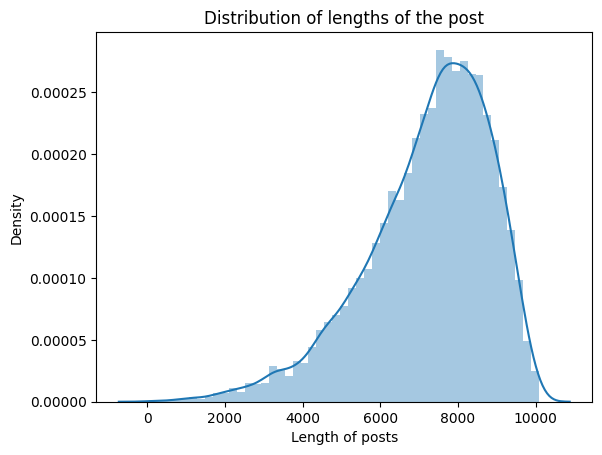

In [ ]:
sns.distplot(mbti_df["posts"].apply(len))
plt.xlabel("Length of posts")
plt.ylabel("Density")
plt.title("Distribution of lengths of the post")

In [ ]:
#Finding the most common words in all posts.
words = list(mbti_df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(40)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546)]

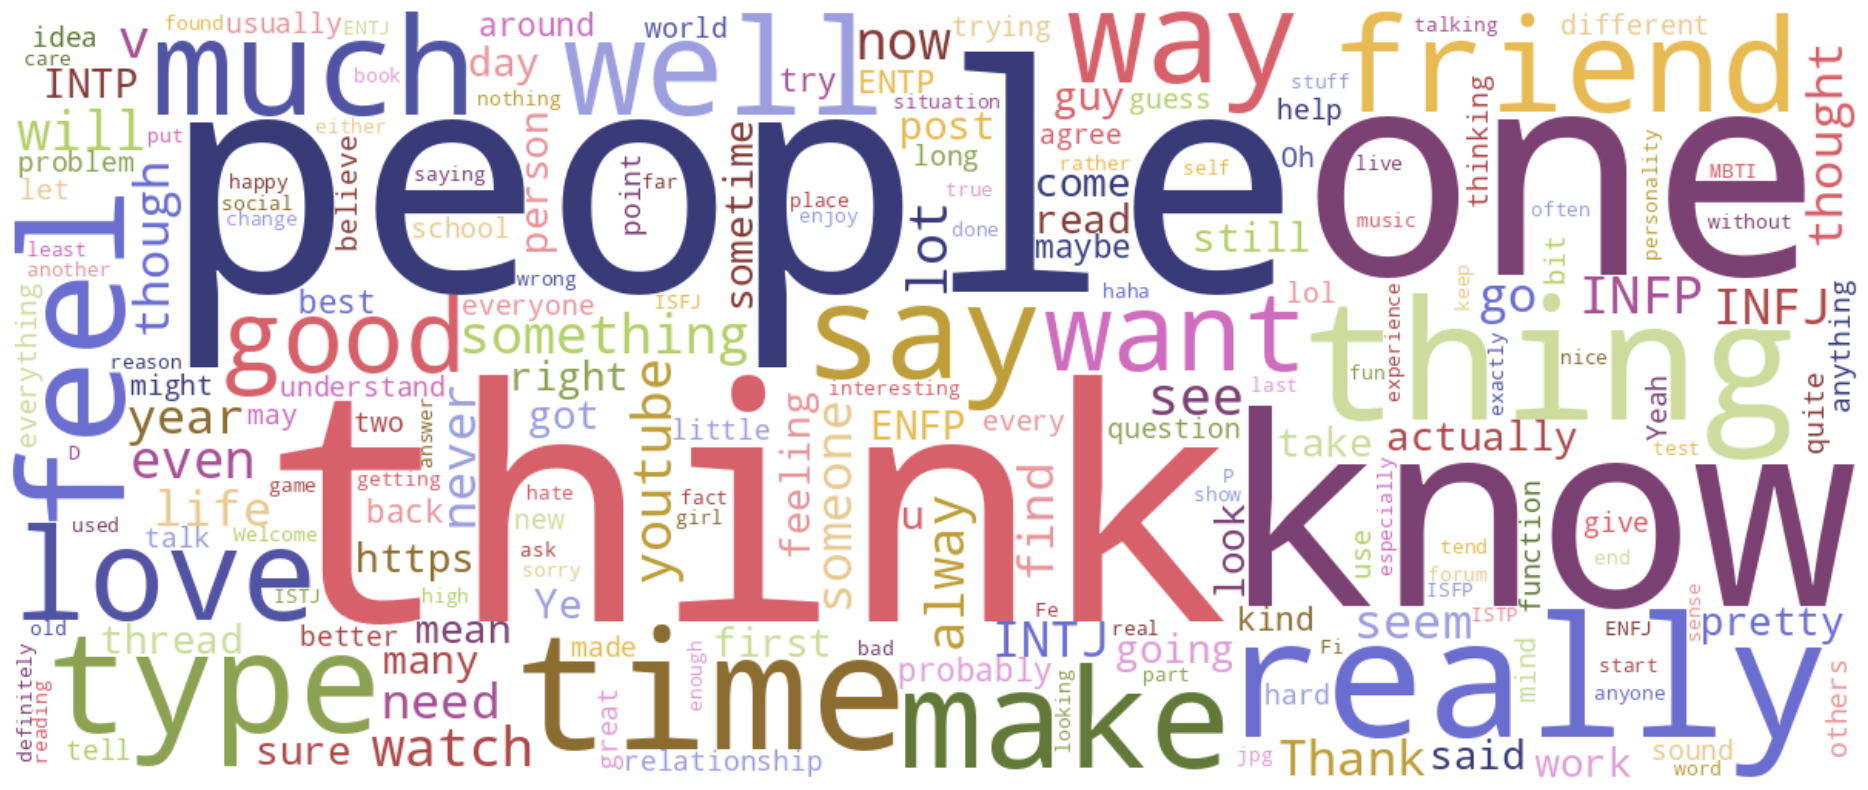

In [ ]:
#Plotting the most common words with WordCloud.
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(words))

# collocations to False  is set to ensure that the word cloud doesn't appear as if it
#contains any duplicate words
plt.figure(figsize=(25,10))
# generate word cloud, interpolation
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

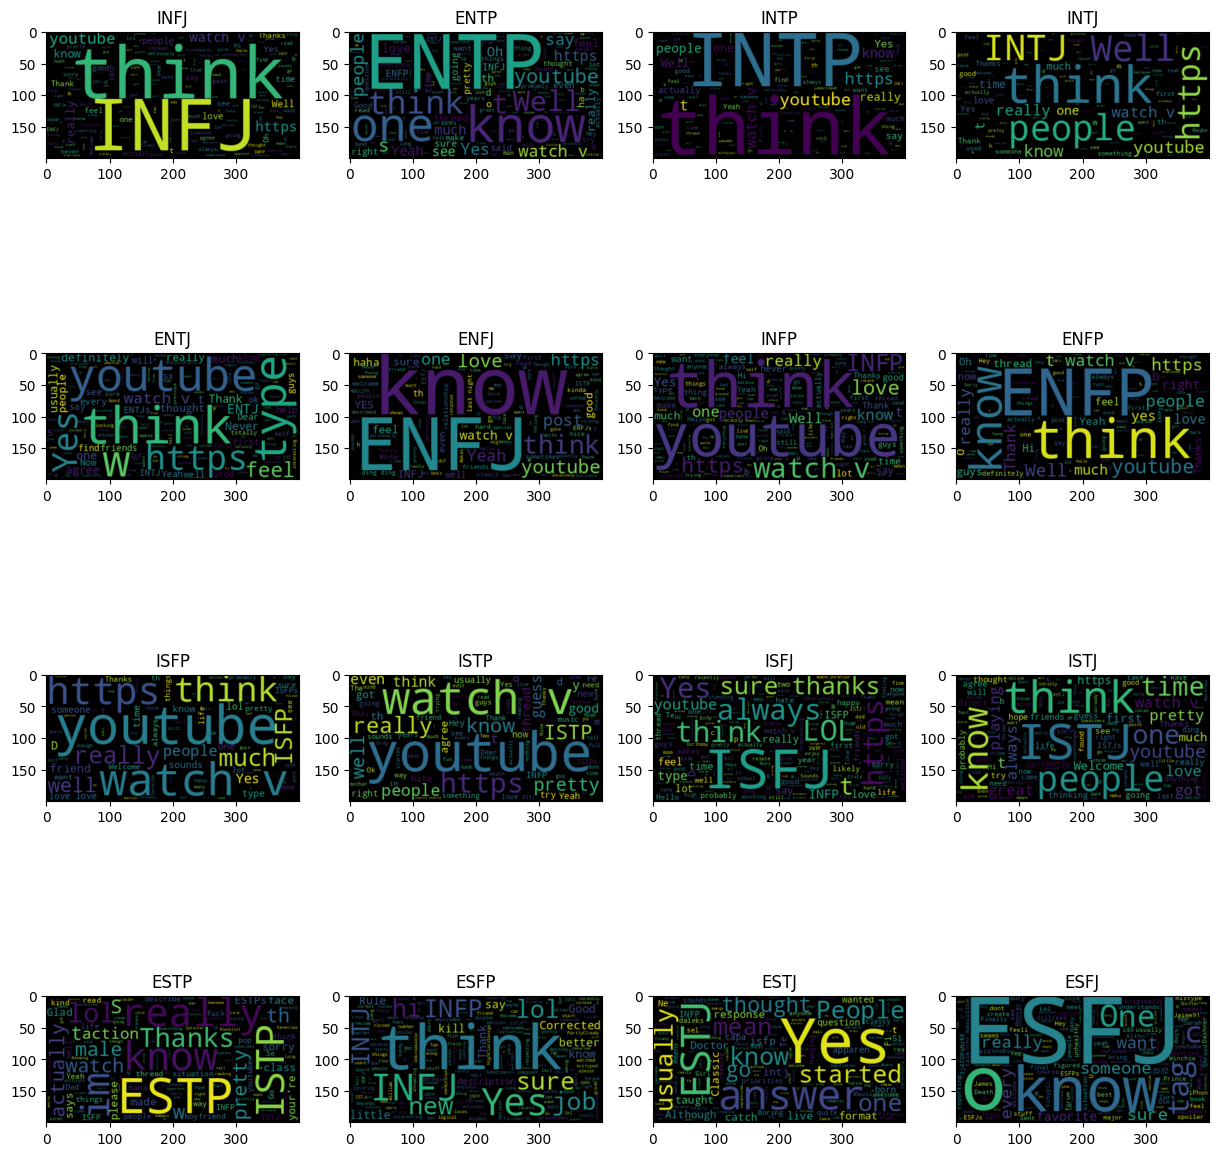

In [ ]:
fig, ax = plt.subplots(len(mbti_df['type'].unique()), sharex=True, figsize=(15,len(mbti_df['type'].unique())))
k = 0
for i in mbti_df['type'].unique():
    df_4 = mbti_df[mbti_df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [ ]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
mbti_df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(mbti_df))
print("Number of posts", len(posts))
print("5 posts from start are:")
posts[0:5]

Number of users 8675
Number of posts 422845
5 posts from start are:


[('INFJ', "'http://www.youtube.com/watch?v=qsXHcwe3krw"),
 ('INFJ', 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg'),
 ('INFJ',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks'),
 ('INFJ', 'What has been the most life-changing experience in your life?'),
 ('INFJ',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.')]

Pre Processing of data

In [ ]:
mbti_df["posts"] = mbti_df["posts"].str.lower()       #converts text in posts to lowercase as it is preferred in nlp

In [ ]:
for i in range(len(mbti_df)):
  post_temp=mbti_df._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')    #to match url links present in the post
  post_temp= re.sub(pattern, ' ', post_temp)                                            #to replace that url link with space
  mbti_df._set_value(i, 'posts',post_temp)

In [ ]:
for i in range(len(mbti_df)):
  post_temp=mbti_df._get_value(i, 'posts')
  pattern = re.compile(r'[0-9]')                                    #to match numbers from 0 to 9
  post_temp= re.sub(pattern, ' ', post_temp)                        #to replace them with space
  pattern = re.compile('\W+')                                       #to match alphanumeric characters
  post_temp= re.sub(pattern, ' ', post_temp)                        #to replace them with space
  pattern = re.compile(r'[_+]')
  post_temp= re.sub(pattern, ' ', post_temp)
  mbti_df._set_value(i, 'posts',post_temp)

In [ ]:
for i in range(len(mbti_df)):
  post_temp=mbti_df._get_value(i, 'posts')
  pattern = re.compile('\s+')                                     #to match multiple whitespaces
  post_temp= re.sub(pattern, ' ', post_temp)                      #to replace them with single whitespace
  mbti_df._set_value(i, 'posts', post_temp)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
remove_words = stopwords.words("english")
for i in range(mbti_df.shape[0]):
  post_temp=mbti_df._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])    #to remove stopwords
  mbti_df._set_value(i, 'posts', post_temp)

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
for i in range(mbti_df.shape[0]):
  post_temp=mbti_df._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')]) #to implement lemmetization i.e. to group together different forms of a word
  mbti_df._set_value(i, 'posts', post_temp)

In [ ]:
print(mbti_df)

      type                                              posts
0     INFJ   enfp intj moment sportscenter top ten play pr...
1     ENTP   finding lack post alarming sex boring positio...
2     INTP   good one course say know blessing curse absol...
3     INTJ   dear intp enjoyed conversation day esoteric g...
4     ENTJ   fired another silly misconception approaching...
...    ...                                                ...
8670  ISFP   ixfp always think cat fi doms reason especial...
8671  ENFP   thread already exists someplace else post hec...
8672  INTP   many question thing would take purple pill pi...
8673  INFP   conflicted right come wanting child honestly ...
8674  INFP   long since personalitycafe although seem chan...

[8675 rows x 2 columns]


**Training and Testing of Data**

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(mbti_df,test_size=0.2,random_state=42,stratify=mbti_df.type)

In [ ]:
print(test_data)

      type                                              posts
7814  INFP   macona depends big family extroverted people ...
2233  ENFJ   blodsmak sveltihel brilliant episode regenera...
7261  INFJ   heylena lol compliment accepted thank jeesh f...
7794  INFJ   pac right rocket coffin like packed warhead r...
2950  INTJ   title thread misleading mention world dominat...
...    ...                                                ...
2006  INTJ   one sentence restrictive accurately portray d...
7137  ISTJ   wanted like odd hybrid dr james wilson house ...
6091  ENTP   took cognitive process test got cognitive pro...
2997  INFJ   get caught fantacy relationship better forget...
5458  ENTJ   doll love movie listed make think tritype one...

[1735 rows x 2 columns]


In [ ]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english')
vectorizer.fit(train_data.posts)
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(train_post,train_target)
pred_gnb=model_gnb.predict(test_post)

In [ ]:
pred_training_gnb=model_gnb.predict(train_post)
print("The train accuracy score for model trained on Gaussian Naive Bayes Classifier is:",accuracy_score(train_target,pred_training_gnb))
print("The test acccuracy score for model trained on Gaussian Naive Bayes Classifier is:",accuracy_score(test_target,pred_gnb))


The train accuracy score for model trained on Gaussian Naive Bayes Classifier is: 0.676657060518732
The test acccuracy score for model trained on Gaussian Naive Bayes Classifier is: 0.25878962536023054


In [ ]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Gaussian Naive Bayes\n',classification_report(test_target,model_gnb.predict(test_post),target_names=personality_types))

Test classification report of Gaussian Naive Bayes
               precision    recall  f1-score   support

        ENFJ       0.09      0.05      0.07        38
        ENFP       0.21      0.24      0.22       135
        ENTJ       0.01      0.02      0.02        46
        ENTP       0.23      0.20      0.22       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.34      0.30      0.32       294
        INFP       0.42      0.33      0.37       366
        INTJ       0.27      0.29      0.28       218
        INTP       0.36      0.32      0.34       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.08      0.15      0.11        54
        ISTJ       0.15      0.12      0.14        41
        ISTP       0.09      0.27      0.13        67

    accuracy                

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier()
model_rfc.fit(train_post,train_target)
pred_rfc=model_rfc.predict(test_post)
pred_training_rfc=model_rfc.predict(train_post)
print("The train accuracy score for model trained on Random Forest Classifier is:",accuracy_score(train_target,pred_training_rfc))
print("The test acccuracy score for model trained on Random Forest Classifier is:",accuracy_score(test_target,pred_rfc))

The train accuracy score for model trained on Random Forest Classifier is: 1.0
The test acccuracy score for model trained on Random Forest Classifier is: 0.5429394812680115


In [ ]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Random Forest Classifier\n',classification_report(test_target,model_rfc.predict(test_post),target_names=personality_types))

Test classification report of Random Forest Classifier
               precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        38
        ENFP       0.75      0.40      0.52       135
        ENTJ       0.00      0.00      0.00        46
        ENTP       0.62      0.31      0.42       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.53      0.71      0.61       294
        INFP       0.46      0.88      0.60       366
        INTJ       0.65      0.48      0.55       218
        INTP       0.61      0.73      0.66       261
        ISFJ       0.00      0.00      0.00        33
        ISFP       0.00      0.00      0.00        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.78      0.31      0.45        67

    accuracy            

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(train_post,train_target)
pred_lr=model_lr.predict(test_post)
pred_training_lr=model_lr.predict(train_post)
print("The train accuracy score for model trained on Logistic Regression is:",accuracy_score(train_target,pred_training_lr))
print("The test accuracy score for model trained on Logistic Regression is:",accuracy_score(test_target,pred_lr))

The train accuracy score for model trained on Logistic Regression is: 0.7955331412103747
The test accuracy score for model trained on Logistic Regression is: 0.6501440922190201


In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(train_post,train_target)
pred_xgb=model_xgb.predict(test_post)

In [ ]:
pred_training_xgb=model_xgb.predict(train_post)
print("The train accuracy score for model trained on XGBoost Classifier is:",accuracy_score(train_target,pred_training_xgb))
print("The test accuracy score for model trained on XGBoost classifier is:",accuracy_score(test_target,pred_xgb))

The train accuracy score for model trained on XGBoost Classifier is: 1.0
The test accuracy score for model trained on XGBoost classifier is: 0.6605187319884727


In [ ]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(train_post,train_target)
pred_svc=model_svc.predict(test_post)
pred_training_svc=model_svc.predict(train_post)
print("The train accuracy score for model trained on Support Classifier is:",accuracy_score(train_target,pred_training_svc))
print("The test accuracy score for model trained on Support Vector classifier is:",accuracy_score(test_target,pred_svc))

The train accuracy score for model trained on Support Classifier is: 0.9510086455331412
The test accuracy score for model trained on Support Vector classifier is: 0.6536023054755044


In [ ]:
result_df=pd.DataFrame({'Model':["Gaussian NB","Random Forest","Logistic Regresssion","XGBoost","SVM"],
                        'Accuracy':[accuracy_score(test_target,pred_gnb),accuracy_score(test_target,pred_rfc),accuracy_score(test_target,pred_lr),accuracy_score(test_target,pred_xgb),accuracy_score(test_target,pred_svc)]})

In [ ]:
print(result_df.sort_values(by = 'Accuracy'))

                  Model  Accuracy
0           Gaussian NB  0.258790
1         Random Forest  0.560231
2  Logistic Regresssion  0.650144
4                   SVM  0.653602
3               XGBoost  0.660519


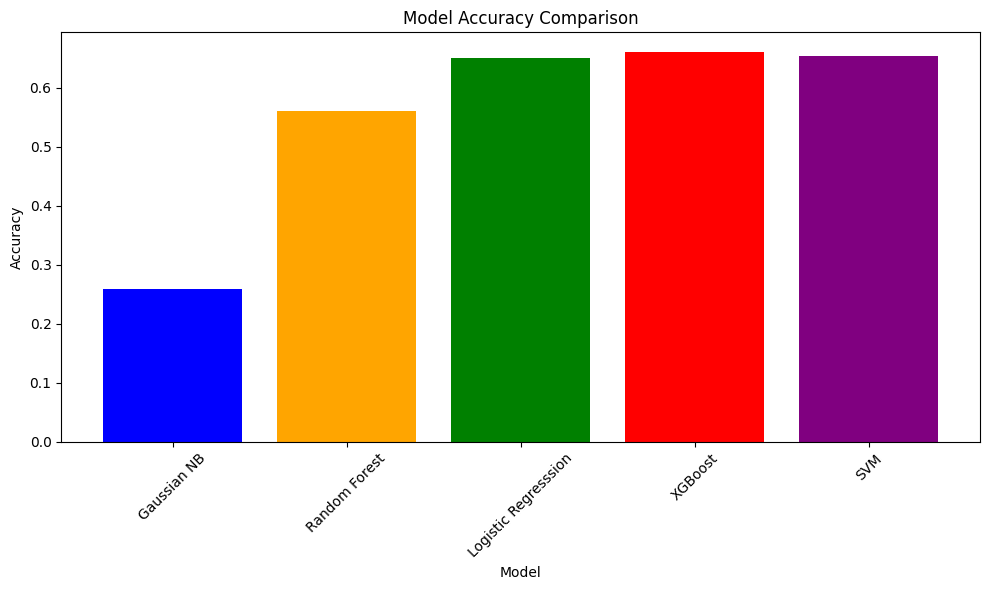

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the DataFrame
result_df = pd.DataFrame({
    'Model': ["Gaussian NB", "Random Forest", "Logistic Regresssion", "XGBoost", "SVM"],
    'Accuracy': [accuracy_score(test_target, pred_gnb),accuracy_score(test_target, pred_rfc), accuracy_score(test_target, pred_lr),
                 accuracy_score(test_target, pred_xgb), accuracy_score(test_target, pred_svc)]
})

# Set different colors for each model
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(result_df['Model'], result_df['Accuracy'], color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Four Classifiers across MBTI Axis**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/mbti_1.csv')
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [ ]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0

    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found')

    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')

    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')

    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J })

data = data.join(data.apply (lambda row: get_types (row),axis=1))
data.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", data['IE'].value_counts()[0], " / ", data['IE'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", data['NS'].value_counts()[0], " / ", data['NS'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", data['TF'].value_counts()[0], " / ", data['TF'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", data['JP'].value_counts()[0], " / ", data['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) / Sensing (S):		 1197  /  7478
Thinking (T) / Feeling (F):		 4694  /  3981
Judging (J) / Perceiving (P):		 5241  /  3434


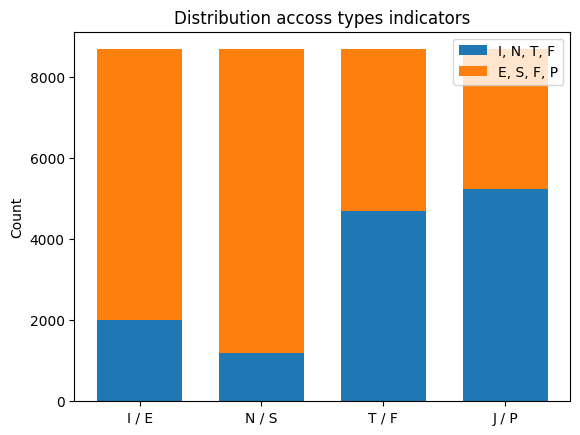

In [ ]:

#Plotting the distribution of each personality type indicator
N = 4
bottom = (data['IE'].value_counts()[0], data['NS'].value_counts()[0], data['TF'].value_counts()[0], data['JP'].value_counts()[0])
top = (data['IE'].value_counts()[1], data['NS'].value_counts()[1], data['TF'].value_counts()[1], data['JP'].value_counts()[1])
ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.7           # or len(x) can also be used here
p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P")
plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()
plt.show()


In [ ]:
data[['IE','NS','TF','JP']].corr()

,IE,NS,TF,JP
IE,1.000000,-0.045899,-0.069573,0.161939
NS,-0.045899,1.000000,-0.080954,0.014922
TF,-0.069573,-0.080954,1.000000,-0.004673
JP,0.161939,0.014922,-0.004673,1.000000


<Axes: title={'center': 'Features Correlation Heatmap'}>

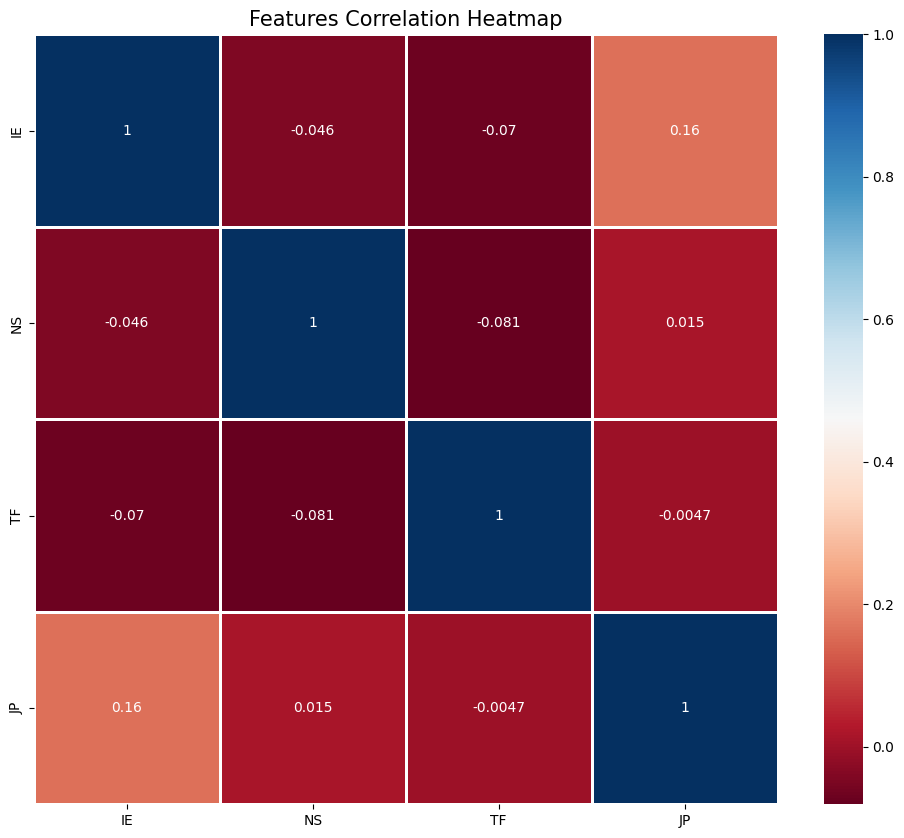

In [ ]:
cmap = plt.cm.RdBu
corr = data[['IE','NS','TF','JP']].corr()
plt.figure(figsize=(12,10))
plt.title('Features Correlation Heatmap', size=15)
sns.heatmap(corr, cmap=cmap,  annot=True, linewidths=1)

In [ ]:
lemmatiser = WordNetLemmatizer()

# Remove the stop words for speed
useless_words = stopwords.words("english")

# Remove these from the posts
unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
unique_type_list = [x.lower() for x in unique_type_list]

# Or we can use Label Encoding (as above) of this unique personality type indicator list
# from sklearn.preprocessing import LabelEncoder
# unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
#        'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
# lab_encoder = LabelEncoder().fit(unique_type_list)

In [ ]:
# Splitting the MBTI personality into 4 letters and binarizing it

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    return [b_Pers[l] for l in personality]

#To show result output for personality prediction
def translate_back(personality):
    # transform binary vector to mbti personality
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 ...
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 1]]


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True):
  list_personality = []
  list_posts = []
  len_data = len(data)
  i=0

  for row in data.iterrows():
      # check code working
      # i+=1
      # if (i % 500 == 0 or i == 1 or i == len_data):
      #     print("%s of %s rows" % (i, len_data))

      #Remove and clean comments
      posts = row[1].posts

      #Remove url links
      temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)

      #Remove Non-words - keep only words
      temp = re.sub("[^a-zA-Z]", " ", temp)

      # Remove spaces > 1
      temp = re.sub(' +', ' ', temp).lower()

      #Remove multiple letter repeating words
      temp = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', temp)

      #Remove stop words
      if remove_stop_words:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in useless_words])
      else:
          temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

      #Remove MBTI personality words from posts
      if remove_mbti_profiles:
          for t in unique_type_list:
              temp = temp.replace(t,"")

      # transform mbti to binary vector
      type_labelized = translate_personality(row[1].type) #or use lab_encoder.transform([row[1].type])[0]
      list_personality.append(type_labelized)
      # the cleaned data temp is passed here
      list_posts.append(temp)

  # returns the result
  list_posts = np.array(list_posts)
  list_personality = np.array(list_personality)
  return list_posts, list_personality

list_posts, list_personality  = pre_process_text(data, remove_stop_words=True, remove_mbti_profiles=True)

print("Example :")
print("\nPost before preprocessing:\n\n", data.posts[0])
print("\nPost after preprocessing:\n\n", list_posts[0])
print("\nMBTI before preprocessing:\n\n", data.type[0])
print("\nMBTI after preprocessing:\n\n", list_personality[0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Example :

Post before preprocessing:

 'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/up

In [ ]:
nRow, nCol = list_personality.shape
print(f'No. of posts = {nRow}  and No. of Personalities = {nCol} ')

No. of posts = 8675  and No. of Personalities = 4 


In [ ]:
# Vectorizing the database posts to a matrix of token counts for the model
cntizer = CountVectorizer(analyzer="word",
                             max_features=1000,
                             max_df=0.7,
                             min_df=0.1)
# the feature should be made of word n-gram
# Learn the vocabulary dictionary and return term-document matrix
print("Using CountVectorizer :")
X_cnt = cntizer.fit_transform(list_posts)

#The enumerate object yields pairs containing a count and a value (useful for obtaining an indexed list)
feature_names = list(enumerate(cntizer.get_feature_names_out()))
print("10 feature names can be seen below")
print(feature_names[0:10])

# For the Standardization or Feature Scaling Stage :-
# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
print("\nUsing Tf-idf :")

print("Now the dataset size is as below")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()
print(X_tfidf.shape)

Using CountVectorizer :
10 feature names can be seen below
[(0, 'ability'), (1, 'able'), (2, 'absolutely'), (3, 'across'), (4, 'act'), (5, 'action'), (6, 'actually'), (7, 'add'), (8, 'advice'), (9, 'afraid')]

Using Tf-idf :
Now the dataset size is as below
(8675, 595)


In [ ]:
#counting top 10 words
reverse_dic = {}
for key in cntizer.vocabulary_:
    reverse_dic[cntizer.vocabulary_[key]] = key
top_10 = np.asarray(np.argsort(np.sum(X_cnt, axis=0))[0,-10:][0, ::-1]).flatten()
[reverse_dic[v] for v in top_10]

['feel',
 'type',
 'well',
 'say',
 'way',
 'friend',
 'want',
 'love',
 'good',
 'something']

In [ ]:
personality_type = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) / Sensing (S)",
                   "FT: Feeling (F) / Thinking (T)", "JP: Judging (J) / Perceiving (P)"  ]

for l in range(len(personality_type)):
    print(personality_type[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) / Sensing (S)
FT: Feeling (F) / Thinking (T)
JP: Judging (J) / Perceiving (P)


In [ ]:
print("X: 1st posts in tf-idf representation\n%s" % X_tfidf[0])

X: 1st posts in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08105478 0.07066064
 0.         0.         0.         0.         0.         0.
 0.         0.04516864 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05321691 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0871647  0.         0.         0.
 0.         0.         0.         0.05506308 0.0708757  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.16585935 0.         0.         0.09676192 0.
 0.         0.04970682 0.         0.         0.         0.
 0.07397056 0.         0.         0.         0.         0.
 0.       

In [ ]:
print("For MBTI personality type : %s" % translate_back(list_personality[0,:]))
print("Y : Binarized MBTI 1st row: %s" % list_personality[0,:])

For MBTI personality type : INFJ
Y : Binarized MBTI 1st row: [0 0 0 0]


In [ ]:
# Posts in tf-idf representation
X = X_tfidf

In [ ]:
#XGBoost model for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)

    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 75.52%
NS: Intuition (N) / Sensing (S) Accuracy: 85.19%
FT: Feeling (F) / Thinking (T) Accuracy: 67.69%
JP: Judging (J) / Perceiving (P) Accuracy: 61.79%


In [ ]:
# Logistic Regression for MBTI dataset
# Individually training each mbti personlity type
for l in range(len(personality_type)):

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)

    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)

    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.54%
NS: Intuition (N) / Sensing (S) Accuracy: 86.06%
FT: Feeling (F) / Thinking (T) Accuracy: 72.44%
JP: Judging (J) / Perceiving (P) Accuracy: 64.51%


In [ ]:
# setup parameters for xgboost
param = {}

param['n_estimators'] = 200 #100
param['max_depth'] = 2 #3
param['nthread'] = 8 #1
param['learning_rate'] = 0.2 #0.1

# Individually training each mbti personlity type
for l in range(len(personality_type)):
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("%s Accuracy: %.2f%%" % (personality_type[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) Accuracy: 77.40%
NS: Intuition (N) / Sensing (S) Accuracy: 85.89%
FT: Feeling (F) / Thinking (T) Accuracy: 69.79%
JP: Judging (J) / Perceiving (P) Accuracy: 63.95%


**Personality Prediction 1 - cover letter**

In [ ]:
my_posts  = """ Hi I am 21 years, currently, I am pursuing my graduate degree in computer science and management (Mba Tech CS ), It is a 5-year dual degree.... My CGPA to date is 3.8/4.0 . I have a passion for teaching since childhood. Math has always been the subject of my interest in school. Also, my mother has been one of my biggest inspirations for me. She started her career as a teacher and now has her own education trust with preschools schools in Rural and Urban areas. During the period of lockdown, I dwelled in the field of blogging and content creation on Instagram.  to spread love positivity kindness . I hope I am able deliver my best to the platform and my optimistic attitude helps in the growth that is expected. Thank you for the opportunity. """

# The type is just a dummy so that the data prep function can be reused
mydata = pd.DataFrame(data={'type': ['INFJ'], 'posts': [my_posts]})

my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#XGBoost model for MBTI dataset
result = []
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)

    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [ ]:
print("The result is: ", translate_back(result))

The result is:  INFJ


**a poem**

In [ ]:
my_posts = """ They act like they care They tell me to share But when
I carve the stories on my arm The doctor just calls it self harm I’m not asking for attention There’s a reason I have apprehensions I just need you to see What has become
 of me||| I know I’m going crazy But they think my thoughts are just hazy When in that chaos, in that confusion
  I’m crying out for help, to escape my delusions||| Mental health is a state of mind How does one keep that up when assistance is denied All my failed attempts to fight the blaze You treat it like its a passing phase||| Well stop, its not, because mental illness is real Understand that we’re all not made of steel Because when you brush these issues under the carpet You make it seem like its our mistake we’re not guarded||| Don’t you realise that its a problem that needs to be addressed Starting at home, in our nest Why do you keep your mouths shut about such things Instead of caring for those with broken wings||| What use is this social stigma When mental illness is not even such an enigma Look around and you’ll see the numbers of the affected hiding under the covers ||| This is an issue that needs to be discussed Not looked down upon with disgust Mental illness needs to be accepted So that people can be protected ||| Let me give you some direction People need affection The darkness must be escaped Only then the lost can be saved||| Bring in a change Something not very strange The new year is here Its time to eradicate fear||| Recognise the wrists under the knives To stop mental illness from taking more lives Let’s break the convention Start ‘suicide prevention’.||| Hoping the festival of lights drives the darkness of mental illness away"""
mydata = pd.DataFrame(data={'type': ['INFP'], 'posts': [my_posts]})
my_posts, dummy  = pre_process_text(mydata, remove_stop_words=True, remove_mbti_profiles=True)
my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

#XGBoost model for MBTI dataset
result = []
# Individually training each mbti personlity type
for l in range(len(personality_type)):
    print("%s classifier trained" % (personality_type[l]))

    Y = list_personality[:,l]

    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)

    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained


In [ ]:
print("The result is: ", translate_back(result))

The result is:  INTP


In [ ]:
test_posts = """
This is a valid input with only letters and spaces.
"""

test_data = pd.DataFrame(data={'type': ['INFP'], 'posts': [test_posts]})

# Preprocess the test data
test_posts_processed, dummy = pre_process_text(test_data, remove_stop_words=True, remove_mbti_profiles=True)

# Now, use the modified code to check if the post contains only letters and spaces
for post in test_posts_processed:
    # Check if the post is null or contains only numbers and percentages
    if not post.strip() or re.match("^[0-9.%\s]+$", post):
        print("The input is invalid or null - please provide valid text input.")
        break

    # Check if the post contains only letters and spaces
    if not re.match("^[a-zA-Z\s]+$", post):
        print("The input is invalid.")
        break  # Stop further processing if the input is invalid

    # Check if the post is too short
    if len(post.split()) < 5:  # Adjust the threshold as needed
        print("The input is invalid - text is too short.")
        break  # Stop further processing if the input is invalid
else:
    # Transform the valid test data
    test_X_cnt = cntizer.transform(test_posts_processed)
    test_X_tfidf = tfizer.transform(test_X_cnt).toarray()

    # Make predictions using the trained XGBoost model
    result = []
    for l in range(len(personality_type)):
        print("%s classifier trained" % (personality_type[l]))

        Y = list_personality[:, l]

        # Assuming X, list_personality, and other variables are defined from your code snippet
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

        # Fit model on training data
        model = XGBClassifier(**param)
        model.fit(X_train, y_train)

        # Make predictions for the valid test data
        y_pred = model.predict(test_X_tfidf)
        result.append(y_pred[0])

    # Print the result
    print("The result is:", translate_back(result))


The input is invalid - text is too short.


In [ ]:
test_posts = """

"""

test_data = pd.DataFrame(data={'type': ['INFP'], 'posts': [test_posts]})

# Preprocess the test data
test_posts_processed, dummy = pre_process_text(test_data, remove_stop_words=True, remove_mbti_profiles=True)

# Now, use the modified code to check if the post contains only letters and spaces
for post in test_posts_processed:
    # Check if the post is null or contains only numbers and percentages
    if not post.strip() or re.match("^[0-9.%\s]+$", post):
        print("The input is invalid or null - please provide valid text input.")
        break

    # Check if the post contains only letters and spaces
    if not re.match("^[a-zA-Z\s]+$", post):
        print("The input is invalid.")
        break  # Stop further processing if the input is invalid

    # Check if the post is too short
    if len(post.split()) < 5:  # Adjust the threshold as needed
        print("The input is invalid - text is too short.")
        break  # Stop further processing if the input is invalid
else:
    # Transform the valid test data
    test_X_cnt = cntizer.transform(test_posts_processed)
    test_X_tfidf = tfizer.transform(test_X_cnt).toarray()

    # Make predictions using the trained XGBoost model
    result = []
    for l in range(len(personality_type)):
        print("%s classifier trained" % (personality_type[l]))

        Y = list_personality[:, l]

        # Assuming X, list_personality, and other variables are defined from your code snippet
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

        # Fit model on training data
        model = XGBClassifier(**param)
        model.fit(X_train, y_train)

        # Make predictions for the valid test data
        y_pred = model.predict(test_X_tfidf)
        result.append(y_pred[0])

    # Print the result
    print("The result is:", translate_back(result))


The input is invalid or null - please provide valid text input.


In [ ]:
test_posts = """
123 !!!
"""

test_data = pd.DataFrame(data={'type': ['INFP'], 'posts': [test_posts]})

# Preprocess the test data
test_posts_processed, dummy = pre_process_text(test_data, remove_stop_words=True, remove_mbti_profiles=True)

# Now, use the modified code to check if the post contains only letters and spaces
for post in test_posts_processed:
    # Check if the post is null or contains only numbers and percentages
    if not post.strip() or re.match("^[0-9.%\s]+$", post):
        print("The input is invalid or null - please provide valid text input.")
        break

    # Check if the post contains only letters and spaces
    if not re.match("^[a-zA-Z\s]+$", post):
        print("The input is invalid.")
        break  # Stop further processing if the input is invalid

    # Check if the post is too short
    if len(post.split()) < 5:  # Adjust the threshold as needed
        print("The input is invalid - text is too short.")
        break  # Stop further processing if the input is invalid
else:
    # Transform the valid test data
    test_X_cnt = cntizer.transform(test_posts_processed)
    test_X_tfidf = tfizer.transform(test_X_cnt).toarray()

    # Make predictions using the trained XGBoost model
    result = []
    for l in range(len(personality_type)):
        print("%s classifier trained" % (personality_type[l]))

        Y = list_personality[:, l]

        # Assuming X, list_personality, and other variables are defined from your code snippet
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

        # Fit model on training data
        model = XGBClassifier(**param)
        model.fit(X_train, y_train)

        # Make predictions for the valid test data
        y_pred = model.predict(test_X_tfidf)
        result.append(y_pred[0])

    # Print the result
    print("The result is:", translate_back(result))


The input is invalid or null - please provide valid text input.


In [ ]:
test_posts = """They act like they care They tell me to share But when
I carve the stories on my arm The doctor just calls it self harm I’m not asking for attention There’s a reason I have apprehensions I just need you to see What has become
 of me||| I know I’m going crazy But they think my thoughts are just hazy When in that chaos, in that confusion
  I’m crying out for help, to escape my delusions||| Mental health is a state of mind How does one keep that up when assistance is denied All my failed attempts to fight the blaze You treat it like its a passing phase||| Well stop, its not, because mental illness is real Understand that we’re all not made of steel Because when you brush these issues under the carpet You make it seem like its our mistake we’re not guarded||| Don’t you realise that its a problem that needs to be addressed Starting at home, in our nest Why do you keep your mouths shut about such things Instead of caring for those with broken wings||| What use is this social stigma When mental illness is not even such an enigma Look around and you’ll see the numbers of the affected hiding under the covers ||| This is an issue that needs to be discussed Not looked down upon with disgust Mental illness needs to be accepted So that people can be protected ||| Let me give you some direction People need affection The darkness must be escaped Only then the lost can be saved||| Bring in a change Something not very strange The new year is here Its time to eradicate fear||| Recognise the wrists under the knives To stop mental illness from taking more lives Let’s break the convention Start ‘suicide prevention’.||| Hoping the festival of lights drives the darkness of mental illness away
"""

test_data = pd.DataFrame(data={'type': ['INFP'], 'posts': [test_posts]})

# Preprocess the test data
test_posts_processed, dummy = pre_process_text(test_data, remove_stop_words=True, remove_mbti_profiles=True)

# Now, use the modified code to check if the post contains only letters and spaces
for post in test_posts_processed:
    # Check if the post is null or contains only numbers and percentages
    if not post.strip() or re.match("^[0-9.%\s]+$", post):
        print("The input is invalid or null - please provide valid text input.")
        break

    # Check if the post contains only letters and spaces
    if not re.match("^[a-zA-Z\s]+$", post):
        print("The input is invalid.")
        break  # Stop further processing if the input is invalid

    # Check if the post is too short
    if len(post.split()) < 5:  # Adjust the threshold as needed
        print("The input is invalid - text is too short.")
        break  # Stop further processing if the input is invalid
else:
    # Transform the valid test data
    test_X_cnt = cntizer.transform(test_posts_processed)
    test_X_tfidf = tfizer.transform(test_X_cnt).toarray()

    # Make predictions using the trained XGBoost model
    result = []
    for l in range(len(personality_type)):
        print("%s classifier trained" % (personality_type[l]))

        Y = list_personality[:, l]

        # Assuming X, list_personality, and other variables are defined from your code snippet
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

        # Fit model on training data
        model = XGBClassifier(**param)
        model.fit(X_train, y_train)

        # Make predictions for the valid test data
        y_pred = model.predict(test_X_tfidf)
        result.append(y_pred[0])

    # Print the result
    print("The result is:", translate_back(result))


IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained
The result is: INTP


In [ ]:
test_posts = """Hi I am 21 years, currently, I am pursuing my graduate degree in computer science and management (Mba Tech CS ), It is a 5-year dual degree.... My CGPA to date is 3.8/4.0 . I have a passion for teaching since childhood. Math has always been the subject of my interest in school. Also, my mother has been one of my biggest inspirations for me. She started her career as a teacher and now has her own education trust with preschools schools in Rural and Urban areas. During the period of lockdown, I dwelled in the field of blogging and content creation on Instagram.  to spread love positivity kindness . I hope I am able deliver my best to the platform and my optimistic attitude helps in the growth that is expected. Thank you for the opportunity.
"""

test_data = pd.DataFrame(data={'type': ['INFJ'], 'posts': [test_posts]})

# Preprocess the test data
test_posts_processed, dummy = pre_process_text(test_data, remove_stop_words=True, remove_mbti_profiles=True)

# Now, use the modified code to check if the post contains only letters and spaces
for post in test_posts_processed:
    # Check if the post is null or contains only numbers and percentages
    if not post.strip() or re.match("^[0-9.%\s]+$", post):
        print("The input is invalid or null - please provide valid text input.")
        break

    # Check if the post contains only letters and spaces
    if not re.match("^[a-zA-Z\s]+$", post):
        print("The input is invalid.")
        break  # Stop further processing if the input is invalid

    # Check if the post is too short
    if len(post.split()) < 5:  # Adjust the threshold as needed
        print("The input is invalid - text is too short.")
        break  # Stop further processing if the input is invalid
else:
    # Transform the valid test data
    test_X_cnt = cntizer.transform(test_posts_processed)
    test_X_tfidf = tfizer.transform(test_X_cnt).toarray()

    # Make predictions using the trained XGBoost model
    result = []
    for l in range(len(personality_type)):
        print("%s classifier trained" % (personality_type[l]))

        Y = list_personality[:, l]

        # Assuming X, list_personality, and other variables are defined from your code snippet
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

        # Fit model on training data
        model = XGBClassifier(**param)
        model.fit(X_train, y_train)

        # Make predictions for the valid test data
        y_pred = model.predict(test_X_tfidf)
        result.append(y_pred[0])

    # Print the result
    print("The result is:", translate_back(result))

IE: Introversion (I) / Extroversion (E) classifier trained
NS: Intuition (N) / Sensing (S) classifier trained
FT: Feeling (F) / Thinking (T) classifier trained
JP: Judging (J) / Perceiving (P) classifier trained
The result is: INFJ
